### Salary Prediction using Polynomial Regressiom Model

Created by: Ardian Kris Bramantyo

Date: June 21, 2022

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Dataset

In [3]:
df = pd.read_csv('Employee_Salary.csv')

### Data Exploration

In [4]:
df.head()

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


In [5]:
df.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  2000 non-null   float64
 1   Salary               2000 non-null   float64
dtypes: float64(2)
memory usage: 31.4 KB


### Data Visualization

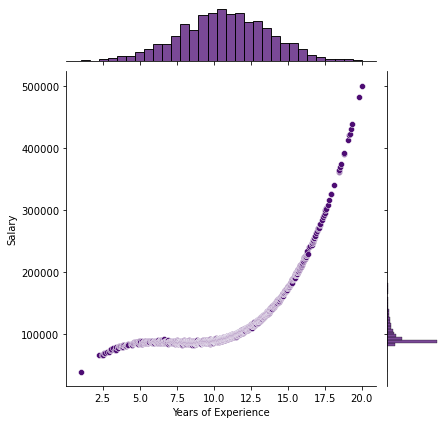

In [8]:
sns.jointplot(x='Years of Experience', y='Salary', data=df, color='#4D0C73')

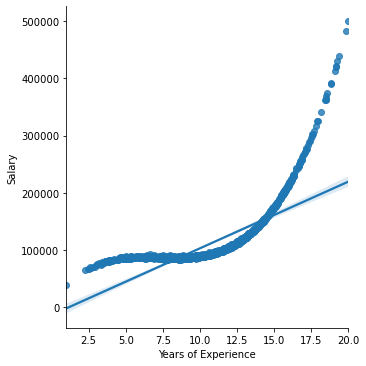

In [13]:
sns.lmplot(x='Years of Experience', y='Salary', data=df)

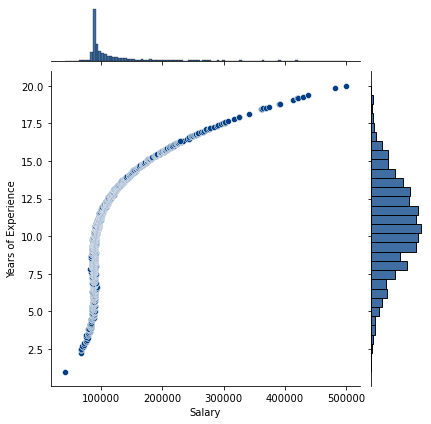

In [16]:
sns.jointplot(x='Salary', y='Years of Experience', data=df, color='#003D83')

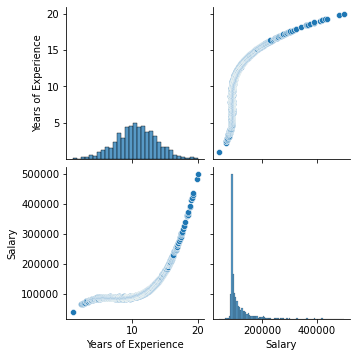

In [15]:
sns.pairplot(df)

### Create Training Dataset

In [26]:
X = df[['Years of Experience']]
X

,Years of Experience
0,1.000000
1,2.257942
2,2.450875
3,2.498713
4,2.613729
...,...
1995,19.178575
1996,19.254499
1997,19.353369
1998,19.842520


In [27]:
X.shape

(2000, 1)

In [29]:
y = df['Salary']
y

0        40000.00000
1        65979.42119
2        67253.57549
3        67342.43510
4        70532.20448
            ...     
1995    421534.69100
1996    430478.02650
1997    438090.84540
1998    482242.16080
1999    500000.00000
Name: Salary, Length: 2000, dtype: float64

In [31]:
X_train = X # Use the entire data of X as X train
y_train = y

### Solution #1: Linear Assumption

### Model Training

In [33]:
from sklearn.linear_model import LinearRegression

#### Case 1: fit_intercept = True

In [34]:
regressor = LinearRegression(fit_intercept = True)

In [35]:
regressor.fit(X_train, y_train)

LinearRegression()

In [37]:
print('Linear Model coeff (m): ', regressor.coef_)
print('Linear Model coeff (b): ', regressor.intercept_)

Linear Model coeff (m):  [11640.22916165]
Linear Model coeff (b):  -13063.099315186846


#### Case 2: fit_intercept = False

In [43]:
regressor2 = LinearRegression(fit_intercept = False)

In [44]:
regressor2.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [45]:
print('Linear Model coeff (m): ', regressor2.coef_)
print('Linear Model coeff (b): ', regressor2.intercept_)

Linear Model coeff (m):  [10511.28514602]
Linear Model coeff (b):  0.0


### Result Visualization

Text(0.5, 1.0, 'Salary vs. Years of Experience (Linear)')

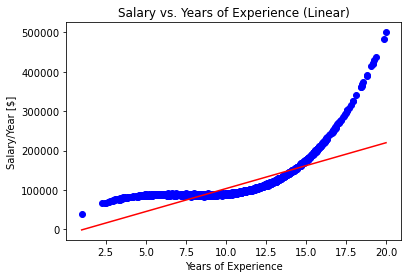

In [54]:
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, regressor.predict(X_train), color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary/Year [$]')
plt.title('Salary vs. Years of Experience (Linear)')

## Solution #2: Polynomial Assumption

### Model Training

In [55]:
from sklearn.preprocessing import PolynomialFeatures

### Order = 2

In [71]:
poly = PolynomialFeatures(degree =2)

In [72]:
X_columns = poly.fit_transform(X_train)

In [73]:
X_columns

array([[  1.        ,   1.        ,   1.        ],
       [  1.        ,   2.25794198,   5.09830199],
       [  1.        ,   2.45087546,   6.00679053],
       ...,
       [  1.        ,  19.35336879, 374.55288352],
       [  1.        ,  19.84251968, 393.72558725],
       [  1.        ,  20.        , 400.        ]])

In [74]:
regressor = LinearRegression()
regressor.fit(X_columns, y_train)

LinearRegression()

In [75]:
print('Model Coeff:', regressor.coef_)

Model Coeff: [     0.         -33106.32895617   2095.78613853]


### Result Visualization

In [76]:
y_predict = regressor.predict(poly.fit_transform(X_train))

Text(0.5, 1.0, 'Salary vs. Years of Experience (Poly order = 2)')

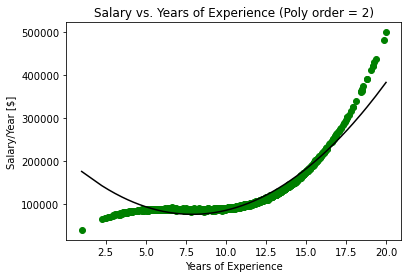

In [78]:
plt.scatter(X_train, y_train, color='green')
plt.plot(X_train, y_predict, color='black')
plt.xlabel('Years of Experience')
plt.ylabel('Salary/Year [$]')
plt.title('Salary vs. Years of Experience (Poly order = 2)')

### Order = 3

In [80]:
poly = PolynomialFeatures(degree =3)

In [81]:
X_columns = poly.fit_transform(X_train)

In [82]:
X_columns

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.25794198e+00, 5.09830199e+00, 1.15116701e+01],
       [1.00000000e+00, 2.45087546e+00, 6.00679053e+00, 1.47218955e+01],
       ...,
       [1.00000000e+00, 1.93533688e+01, 3.74552884e+02, 7.24886009e+03],
       [1.00000000e+00, 1.98425197e+01, 3.93725587e+02, 7.81250771e+03],
       [1.00000000e+00, 2.00000000e+01, 4.00000000e+02, 8.00000000e+03]])

In [83]:
regressor = LinearRegression()
regressor.fit(X_columns, y_train)

LinearRegression()

In [84]:
y_predict = regressor.predict(poly.fit_transform(X_train))

Text(0.5, 1.0, 'Salary vs. Years of Experience (Poly order = 3)')

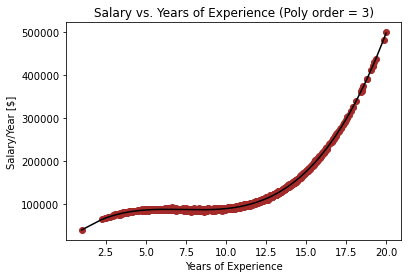

In [86]:
plt.scatter(X_train, y_train, color='brown')
plt.plot(X_train, y_predict, color='black')
plt.xlabel('Years of Experience')
plt.ylabel('Salary/Year [$]')
plt.title('Salary vs. Years of Experience (Poly order = 3)')